In [2]:
import random
from mesa import Model, Agent
from mesa.time import RandomActivation


In [23]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id):
        self.unique_id = unique_id
        self.wealth = 1
    
    def step(self, model):
        if self.wealth == 0:
            return
        other_agent = random.choice(model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
         # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i)
            self.schedule.add(a)

    def step(self):
        self.schedule.step()

In [24]:
empty_model = MoneyModel(10)
empty_model.step()

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
model = MoneyModel(10)
for i in range(10):
    model.step()

(array([ 5.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

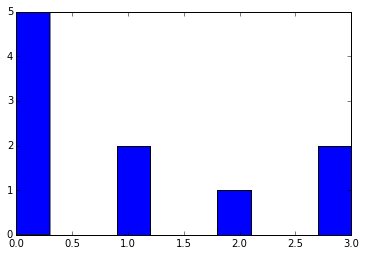

In [33]:
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

(array([ 440.,  293.,  152.,   74.,   27.,   14.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

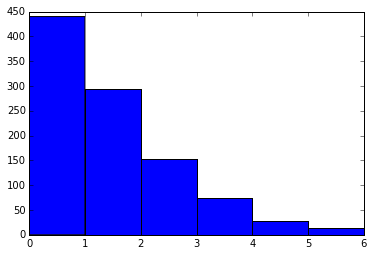

In [37]:
all_wealth = []
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()
    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)
plt.hist(all_wealth, bins=range(max(all_wealth)+1))